## Machine Learning
## Neural Network for regression


In [19]:
# import all necessary libraries 

import numpy as np                                    # For matrices and MATLAB like functions                  
from sklearn.model_selection import train_test_split  # To split data into train and test set

# for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data Generation

Input Feature Vector : $\Large x = [x_1 ,  x_2]^T$ 
<br>
Target Variable : $\Large y$ 
<br>
$$\Large  y = x_1^2 + x_2^3 + x_1x_2$$

In [2]:
n_samples = 1500

X = np.random.uniform(-5,5, (2, n_samples) ).astype(np.float32)

Y = (X[0, :]**2 + X[1,:]**3 + X[0,:]*X[1,:]).astype(np.float32)


### Visualize Mapping from Input Feature Vector $\Large x = [x_1 ,  x_2]^T$ to target variable $\Large y$

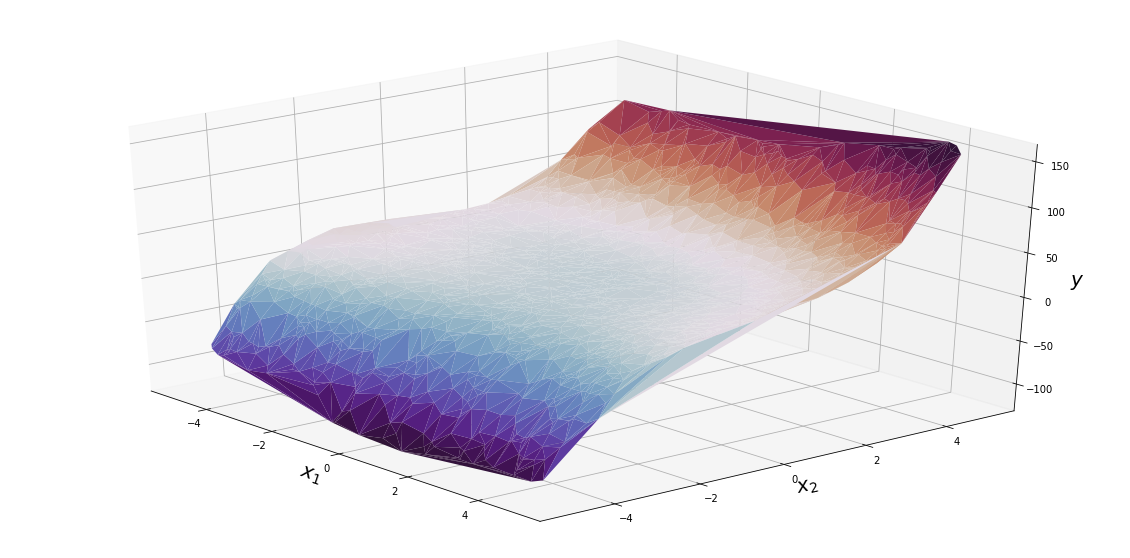

In [3]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')


ax.plot_trisurf(X[0],X[1],Y, cmap='twilight_shifted')
ax.view_init(30, -40)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$y$'  , fontsize=20)

plt.show()

In [4]:
trainX, testX, trainY, testY = train_test_split(X.T, Y, test_size=0.33, random_state=42)


trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1 )
testX  = testX.reshape(testX.shape[0], testX.shape[1], 1 )

trainY = trainY.reshape(trainY.shape[0], 1, 1 )
testY  = testY.reshape(testY.shape[0], 1 ,1)


print("Shape of Train Data:")
print("TrainX: " , trainX.shape)
print("TrainY: " , trainY.shape)



print("\nShape of Test Data:")
print("TestX: " , testX.shape)
print("TestY: " , testY.shape)

Shape of Train Data:
TrainX:  (1005, 2, 1)
TrainY:  (1005, 1, 1)

Shape of Test Data:
TestX:  (495, 2, 1)
TestY:  (495, 1, 1)


---

## NeuralNetwork with Numpy
### Feed Forward and Backpropagation

We will implement 3-layer neural network for regression. Following are the equations for feed forward through network. We are using sigmoid as activation function and mean-squared-error as loss.

$$\Large z_1  = W_1 x + b_1$$
$$\Large h_1  = \sigma(z_1)$$

<br>
<br>

$$\Large z_2  = W_2 h_1 + b_2$$
$$\Large h_2  = \sigma(z_2)$$

<br>
<br>

$$\Large \hat{y}  = W_3 h_2 + b_3$$


<br>
<br>

$$\Large loss  = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$
<center>where N is batch size</center>

In [20]:
class NeuralNetwork(object):        
    
    """
    We will implement neural network as a python class. 
    Object of this class will have a few attributes for example learnable parameters
    and functions such as forward(), backward_propagate() etc.
    
    """
    
    # Initialize attributes of object
    def __init__(self,  input_size = 2 , hidden_size = 3 , output_size = 1 ):        
        
        
        self.input_size  = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        # Learnable weights of neural network
        self.W1 = np.random.rand( hidden_size , input_size  ) # randomly initialize W1 matrix
        self.b1 = np.random.rand( hidden_size , 1           ) # randomly initialize b1 vector
        
        
        self.W2 = np.random.rand( hidden_size , hidden_size ) # randomly initialize W2 matrix
        self.b2 = np.random.rand( hidden_size , 1           ) # randomly initialize b2 vector
        
        self.W3 = np.random.rand( output_size , hidden_size ) # randomly initialize W3 matrix
        self.b3 = np.random.rand( output_size , 1           ) # randomly initialize b3 vector
        
        
#         # Non-learnable parameters of neural network. These parameters are used in back-propagation
        self.z1 = np.zeros( (hidden_size , 1) ) 
        self.h1 = np.zeros( (hidden_size , 1) ) 
        
        self.z2 = np.zeros( (hidden_size , 1) ) 
        self.h2 = np.zeros( (hidden_size , 1) ) 
  
    
    # This function just prints a few properties of object created from this class    
    def __str__(self):
        
        msg = "NeuralNetwork:\n\nSize of Input Layer = " + str(self.input_size) + "\nSize of 1st Hidden Layer  = " + str(self.hidden_size)+ "\nSize of 2nd Hidden Layer  = " + str(self.hidden_size)+ "\nSize of Output Layer  = " + str(self.output_size)
                
        return  msg
            
    # Forward propagation through neural network   
    def forward(self, x):
        
        
        self.z1  = (self.W1 @ x ) + self.b1         # @ operator is used for standard matrix-multiplication 
        
        self.h1  = self.sigmoid(self.z1)            # element-wise operation on vector

        self.z2  = (self.W2 @ self.h1 ) + self.b2        # @ operator is used for standard matrix-multiplication 
        
        self.h2  = self.sigmoid(self.z2)

        y_hat = (self.W3 @ self.h2 ) + self.b3 

        return y_hat  

    # Backward propagation through neural network
    def backward(self , y_hat , x , y , lr):

        # Assuming, MSE (mean square error) loss has been computed
        # Using chain rule, find gradients of learnable parameters of neural network
        # Adjust weights and biases using gradients and learning rate 

        # lr = learning rate
        batch_size = y_hat.shape[0]
        
# #         # Zero-out all gradients
        grad_b3 = np.zeros((batch_size, self.b3.shape[0], self.b3.shape[1] ))
        grad_W3 = np.zeros((batch_size, self.W3.shape[0], self.W3.shape[1] ))
        
        grad_b2 = np.zeros((batch_size, self.b2.shape[0], self.b2.shape[1] ))
        grad_W2 = np.zeros((batch_size, self.W2.shape[0], self.W2.shape[1] ))
        
        grad_b1 = np.zeros((batch_size, self.b1.shape[0], self.b1.shape[1] ))
        grad_W1 = np.zeros((batch_size, self.W1.shape[0], self.W1.shape[1] ))
        
        #output Layer 
        delta3 = (y_hat - y)
        grad_W3 = self.multiply(delta3,self.h2, True)
        grad_b3 = np.multiply((1/batch_size),np.transpose(np.sum(delta3, axis = 0)))
        #2nd last Layer
        delta2 = (np.dot(delta3, self.W3) * np.transpose(self.sigmoid_derivative(self.z2), (0, 2, 1)))
        grad_W2 = self.multiply(self.h1, delta2, False)
        grad_b2 = np.multiply((1/batch_size),np.transpose(np.sum(delta2, axis = 0)))
        # 3rd last layer/ First from feedforward
        delta1 = (np.dot(delta2, self.W2)* np.transpose(self.sigmoid_derivative(self.z1), (0, 2, 1)))        
        grad_W1 = self.multiply(x, delta1, False)
        grad_b1 = np.multiply((1/batch_size),np.transpose(np.sum(delta1, axis = 0)))

        # Take average along batch dimension
        grad_W1 = (np.sum(grad_W1, axis=0) / batch_size).T
        grad_W2 = (np.sum(grad_W2, axis=0) / batch_size).T
        grad_W3 = (np.sum(grad_W3, axis=0) / batch_size)
        
        # Gradient Descent
        # Update weights and biases using gradients        
        self.W3 = self.W3 - lr*grad_W3
        self.b3 = self.b3 - lr*grad_b3
        
        self.W2 = self.W2 - lr*grad_W2
        self.b2 = self.b2 - lr*grad_b2

        self.W1 = self.W1 - lr*grad_W1
        self.b1 = self.b1 - lr*grad_b1
        
    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        s = self.sigmoid(s)
        sigmoidDerivative = s * (1 - s)
        return sigmoidDerivative
    
    def sigmoid(self, x):
        # Activation Function
#         return 1/ (1 + np.exp(-x))      
        sig_x = np.zeros(x.shape)
        
        # protection from overflow and underflow
        low_x = -30
        up_x  = 30
        
        sig_x[x< low_x]=0
        sig_x[x> up_x ]=1
        
        safe_x = x[(x>= low_x) & (x<= up_x)]
        sig_x[(x>= low_x) & (x<= up_x)] = np.exp(safe_x)/(1+np.exp(safe_x))

        return sig_x
        
    def multiply(self,a,b,t):
        output = []
        for i in range(len(a)):
            if t == True:
                output.append(np.dot(a[i],(b[i]).T))
            else:
                output.append(np.dot(a[i], b[i]))
        return np.array(output)
    def mse_loss(self, y, y_hat):
        # Mean Square Error Loss
        loss  =  ((y-y_hat)**2).mean(axis=0)
        return loss
    
 

### Creating a Randomly Initialized Neural Network

In [21]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 4 , output_size = 1 )


print(MyNeuralNet)

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 4
Size of 2nd Hidden Layer  = 4
Size of Output Layer  = 1


### Printing Randomly Initialized Weight Matrix and Bias Vector

In [22]:
print("Weight Matrix of 1st Hidden Layer:\n\nW1 = \n", MyNeuralNet.W1)
print("\n\nBias Vector of 1st Hidden Layer:\n\nb1 = \n", MyNeuralNet.b1)

print("\n\nNote:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.")

Weight Matrix of 1st Hidden Layer:

W1 = 
 [[0.6727992  0.73548067]
 [0.17956494 0.94624081]
 [0.4390708  0.37016201]
 [0.27798784 0.01526289]]


Bias Vector of 1st Hidden Layer:

b1 = 
 [[0.52134819]
 [0.9619422 ]
 [0.96861074]
 [0.31321147]]


Note:  You can easily view other learnable weight matrices and bias vectors of neural network using .dot notation.


In [23]:
x = trainX[:10]
y = trainY[:10]

lr = 0.1


y_hat = MyNeuralNet.forward( x )
print("W1 matrix before weight update:")
print("\nW1 = \n", MyNeuralNet.W1)
MyNeuralNet.backward( y_hat , x , y , lr)
print("\n\nW1 matrix after weight update:")
print("\nW1 = \n", MyNeuralNet.W1)


W1 matrix before weight update:

W1 = 
 [[0.6727992  0.73548067]
 [0.17956494 0.94624081]
 [0.4390708  0.37016201]
 [0.27798784 0.01526289]]


W1 matrix after weight update:

W1 = 
 [[0.29243249 1.28909708]
 [0.08482774 1.03779623]
 [0.26259645 0.7275738 ]
 [0.05968153 0.62969365]]


## Train Neural Network

In [24]:
MyNeuralNet = NeuralNetwork( input_size = 2 , hidden_size = 16 , output_size = 1 )


print(MyNeuralNet)

lr = 0.01

n_epochs = 1000

n_examples = trainX.shape[0]

batch_size =50

n_batches = n_examples//batch_size

epoch_loss = []


print("\n\nTraining...")
for epoch in range(n_epochs):
    
    loss=0
    
    for i in range(n_batches):
        
        x = trainX[(i*batch_size):(i*batch_size+batch_size)]
        y = trainY[(i*batch_size):(i*batch_size+batch_size)]
        
        # Forward Pass
        y_hat = MyNeuralNet.forward( x )
        
        loss = loss+MyNeuralNet.mse_loss(y,y_hat)
        
        # Backpropagation
        MyNeuralNet.backward( y_hat , x , y , lr)
        
    epoch_loss.append(loss.squeeze()/n_batches)    
    print("Epoch = %3d   Loss = %3.3f"%(epoch, epoch_loss[epoch]) )
    
print("\nDone.")    

NeuralNetwork:

Size of Input Layer = 2
Size of 1st Hidden Layer  = 16
Size of 2nd Hidden Layer  = 16
Size of Output Layer  = 1


Training...
Epoch =   0   Loss = 2157.432
Epoch =   1   Loss = 2015.435
Epoch =   2   Loss = 1795.310
Epoch =   3   Loss = 1596.444
Epoch =   4   Loss = 1445.935
Epoch =   5   Loss = 1293.865
Epoch =   6   Loss = 1132.242
Epoch =   7   Loss = 1001.897
Epoch =   8   Loss = 912.678
Epoch =   9   Loss = 844.001
Epoch =  10   Loss = 791.511
Epoch =  11   Loss = 741.392
Epoch =  12   Loss = 693.433
Epoch =  13   Loss = 653.130
Epoch =  14   Loss = 620.853
Epoch =  15   Loss = 594.079
Epoch =  16   Loss = 565.701
Epoch =  17   Loss = 539.257
Epoch =  18   Loss = 492.908
Epoch =  19   Loss = 456.824
Epoch =  20   Loss = 522.447
Epoch =  21   Loss = 424.141
Epoch =  22   Loss = 417.002
Epoch =  23   Loss = 457.984
Epoch =  24   Loss = 363.415
Epoch =  25   Loss = 352.802
Epoch =  26   Loss = 338.383
Epoch =  27   Loss = 363.881
Epoch =  28   Loss = 317.387
Epoch =  

Epoch = 288   Loss = 10.869
Epoch = 289   Loss = 10.781
Epoch = 290   Loss = 10.682
Epoch = 291   Loss = 10.563
Epoch = 292   Loss = 10.410
Epoch = 293   Loss = 10.185
Epoch = 294   Loss = 9.790
Epoch = 295   Loss = 9.010
Epoch = 296   Loss = 10.142
Epoch = 297   Loss = 40.089
Epoch = 298   Loss = 8.592
Epoch = 299   Loss = 8.501
Epoch = 300   Loss = 9.194
Epoch = 301   Loss = 10.300
Epoch = 302   Loss = 9.703
Epoch = 303   Loss = 11.464
Epoch = 304   Loss = 8.678
Epoch = 305   Loss = 8.608
Epoch = 306   Loss = 8.733
Epoch = 307   Loss = 9.478
Epoch = 308   Loss = 8.932
Epoch = 309   Loss = 11.382
Epoch = 310   Loss = 9.249
Epoch = 311   Loss = 10.171
Epoch = 312   Loss = 12.768
Epoch = 313   Loss = 13.421
Epoch = 314   Loss = 11.507
Epoch = 315   Loss = 10.287
Epoch = 316   Loss = 9.466
Epoch = 317   Loss = 8.549
Epoch = 318   Loss = 8.122
Epoch = 319   Loss = 10.248
Epoch = 320   Loss = 10.254
Epoch = 321   Loss = 9.902
Epoch = 322   Loss = 8.450
Epoch = 323   Loss = 8.807
Epoch = 32

Epoch = 595   Loss = 3.621
Epoch = 596   Loss = 4.279
Epoch = 597   Loss = 3.363
Epoch = 598   Loss = 7.032
Epoch = 599   Loss = 8.181
Epoch = 600   Loss = 4.574
Epoch = 601   Loss = 3.536
Epoch = 602   Loss = 3.419
Epoch = 603   Loss = 3.477
Epoch = 604   Loss = 3.462
Epoch = 605   Loss = 3.670
Epoch = 606   Loss = 3.368
Epoch = 607   Loss = 4.516
Epoch = 608   Loss = 3.666
Epoch = 609   Loss = 5.611
Epoch = 610   Loss = 5.230
Epoch = 611   Loss = 3.505
Epoch = 612   Loss = 3.315
Epoch = 613   Loss = 4.156
Epoch = 614   Loss = 3.327
Epoch = 615   Loss = 5.125
Epoch = 616   Loss = 4.826
Epoch = 617   Loss = 3.586
Epoch = 618   Loss = 3.230
Epoch = 619   Loss = 4.238
Epoch = 620   Loss = 3.562
Epoch = 621   Loss = 4.294
Epoch = 622   Loss = 3.714
Epoch = 623   Loss = 4.089
Epoch = 624   Loss = 3.531
Epoch = 625   Loss = 4.097
Epoch = 626   Loss = 3.590
Epoch = 627   Loss = 4.024
Epoch = 628   Loss = 3.571
Epoch = 629   Loss = 3.955
Epoch = 630   Loss = 3.557
Epoch = 631   Loss = 3.888
E

Epoch = 901   Loss = 2.660
Epoch = 902   Loss = 1.766
Epoch = 903   Loss = 2.660
Epoch = 904   Loss = 1.742
Epoch = 905   Loss = 2.659
Epoch = 906   Loss = 1.718
Epoch = 907   Loss = 2.657
Epoch = 908   Loss = 1.695
Epoch = 909   Loss = 2.653
Epoch = 910   Loss = 1.674
Epoch = 911   Loss = 2.649
Epoch = 912   Loss = 1.653
Epoch = 913   Loss = 2.644
Epoch = 914   Loss = 1.634
Epoch = 915   Loss = 2.639
Epoch = 916   Loss = 1.615
Epoch = 917   Loss = 2.634
Epoch = 918   Loss = 1.597
Epoch = 919   Loss = 2.629
Epoch = 920   Loss = 1.580
Epoch = 921   Loss = 2.624
Epoch = 922   Loss = 1.563
Epoch = 923   Loss = 2.620
Epoch = 924   Loss = 1.547
Epoch = 925   Loss = 2.615
Epoch = 926   Loss = 1.532
Epoch = 927   Loss = 2.611
Epoch = 928   Loss = 1.517
Epoch = 929   Loss = 2.607
Epoch = 930   Loss = 1.503
Epoch = 931   Loss = 2.603
Epoch = 932   Loss = 1.490
Epoch = 933   Loss = 2.599
Epoch = 934   Loss = 1.477
Epoch = 935   Loss = 2.596
Epoch = 936   Loss = 1.464
Epoch = 937   Loss = 2.592
E

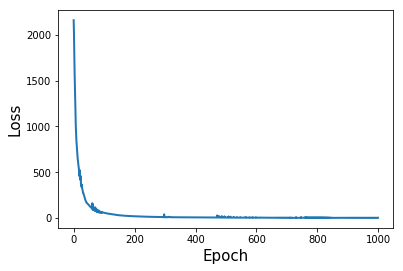

In [25]:
plt.plot(epoch_loss, linewidth=2)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

## Prediction

In [26]:
y_pred = MyNeuralNet.forward(testX)

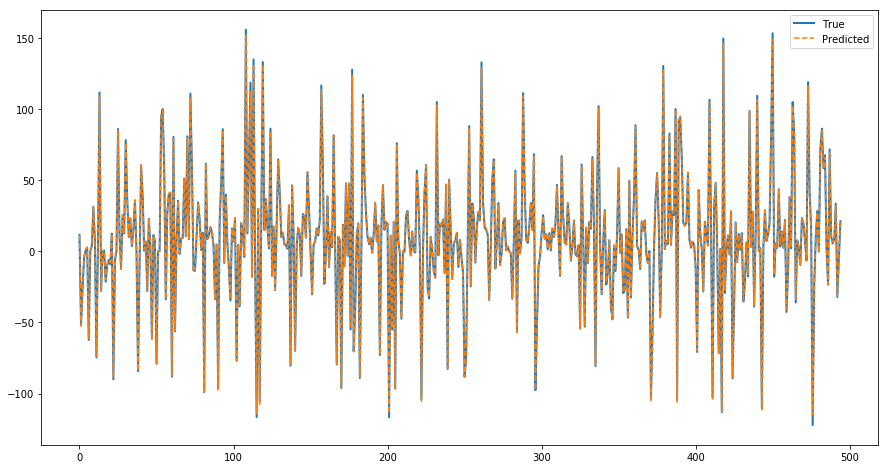

In [27]:
plt.figure(figsize=(15,8))
plt.plot(testY.squeeze(), linewidth=2 , label="True")
plt.plot(y_pred.squeeze(), linestyle="--",  label="Predicted")
plt.legend()
plt.show()

In [28]:
testloss= MyNeuralNet.mse_loss(testY, y_pred)
print(testloss)

[[0.9356108]]


In [29]:
(y_pred - testY).mean(axis = 0)

array([[-0.06804479]])